In [1]:
import pandas as pd

from embhand import EmbeddingsHandler
from text import PreProcessing

In [2]:
glove = EmbeddingsHandler.load_glove("wordemb/glove.840B.300d.txt", 5000)

In [3]:
histo_glove = EmbeddingsHandler.load_glove("wordemb/HistoGlove.txt", 5000)

In [4]:
glove.sort_index(inplace=True)
histo_glove.sort_index(inplace=True)

In [5]:
filtered_idxs = [PreProcessing.cleanText(idx) for idx in glove.index.values]
filtered_idxs = [i for i in filtered_idxs if i]

glove = glove[glove.index.isin(filtered_idxs)]

In [6]:
filtered_idxs = [PreProcessing.cleanText(idx) for idx in histo_glove.index.values]
filtered_idxs = [i for i in filtered_idxs if i]

histo_glove = histo_glove[histo_glove.index.isin(filtered_idxs)]

In [7]:
glove.sort_index(inplace=True)
histo_glove.sort_index(inplace=True)

In [8]:
inters = glove.index.intersection(histo_glove.index)

glove = glove[glove.index.isin(inters)]
histo_glove = histo_glove[histo_glove.index.isin(inters)]

In [9]:
glove.sort_index(inplace=True)
histo_glove.sort_index(inplace=True)

In [10]:
glove.head()

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0,,,,,,,,,,,,,,,,,,,,,
ability,-0.393260,0.39245,-0.239470,0.14063,-0.558840,0.046301,-0.34033,0.393660,-0.314860,2.3024,...,-0.50527,0.29723,-0.37871,0.261870,-0.046033,0.035266,-0.215670,-0.097472,0.344270,-0.21476
able,-0.024725,0.13229,-0.336350,0.25579,-0.019812,-0.088370,-0.23868,0.080368,0.101440,2.7514,...,-0.43014,0.38153,-0.28382,0.108320,0.259360,-0.245450,0.032101,-0.159560,0.353500,-0.07547
absolute,-0.144590,0.22050,0.086909,0.33820,0.227890,-0.245810,0.13967,0.267030,0.092204,1.6055,...,0.56089,0.10089,0.17158,-0.077150,0.122550,0.231600,0.085743,-0.349950,0.054713,-0.29884
absolutely,-0.135610,0.50011,-0.404670,0.19862,-0.129490,0.037039,-0.01934,-0.352330,-0.136370,2.3351,...,0.07478,0.30573,-0.13266,0.032253,0.301600,0.284520,0.008647,-0.314380,0.244990,-0.16272
accept,-0.070007,0.15351,-0.340300,0.25065,0.060614,-0.166570,-0.35126,0.128660,0.100550,2.4681,...,-0.17929,0.45416,-0.37821,-0.146130,0.411630,-0.135970,-0.192650,-0.105480,0.268020,0.14208


In [11]:
histo_glove.head()

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0,,,,,,,,,,,,,,,,,,,,,
ability,-0.197475,0.631508,0.091767,0.021694,0.136945,0.036152,-0.265049,0.339554,-0.529994,-0.328321,...,0.140650,-0.059048,-0.495625,0.328176,-0.568652,0.514420,-0.369352,-0.022673,0.141906,-0.132009
able,0.275543,0.125091,-0.055266,-0.075719,0.206845,-0.007509,-0.275733,-0.019687,-0.382626,-0.346192,...,0.469618,-0.036446,-0.401999,0.053231,-0.136221,0.182191,-0.128628,-0.137478,-0.118922,0.212485
absolute,0.014913,-0.052939,-0.031694,0.653296,-0.320056,-0.136214,0.028422,-0.131987,0.034415,-0.002520,...,0.278762,-0.008173,0.344910,-0.232140,0.056347,0.186869,-0.457866,-0.621475,0.133116,-0.779085
absolutely,0.367234,0.015193,0.328400,0.169398,-0.212155,0.103126,0.658875,0.186441,-0.106735,-0.248525,...,0.126433,-0.384440,-0.174087,0.223493,0.025478,0.636215,0.001488,-0.406235,0.162697,-0.506824
accept,0.117187,0.125642,0.643509,-0.186497,0.320158,0.168898,0.147955,-0.290761,-0.268707,0.212366,...,0.228446,-0.394743,0.007707,0.431432,-0.136534,-0.021808,-0.222026,0.090167,-0.237058,-0.076477


In [12]:
glove.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2297 entries, ability to youth
Columns: 300 entries, 1 to 300
dtypes: float64(300)
memory usage: 5.3+ MB


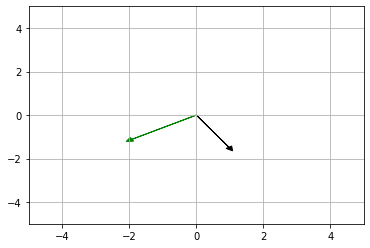

In [13]:
EmbeddingsHandler.plot_word_vectors(histo_glove, glove, "man")

In [14]:
glove_dict = EmbeddingsHandler.to_dict(glove)
histo_dict = EmbeddingsHandler.to_dict(histo_glove)

In [15]:
rs_histo, rs_glove = EmbeddingsHandler.reshape_vocab(histo_dict, glove_dict)

In [16]:
rotated_histo = EmbeddingsHandler.rotate_emb(rs_histo, rs_glove)

In [19]:
rot_histo_df = pd.DataFrame.from_dict(rotated_histo).T

In [20]:
rot_histo_df.sort_index(inplace=True)

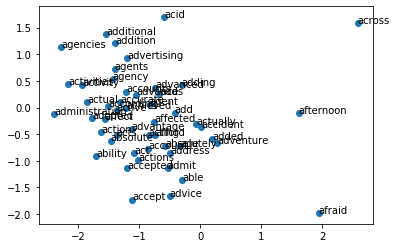

In [17]:
EmbeddingsHandler.plot_words(histo_glove, end=50)

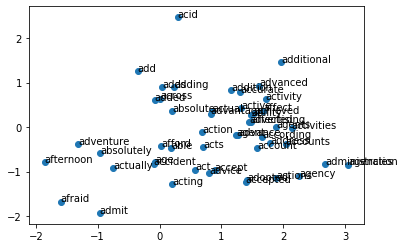

In [18]:
EmbeddingsHandler.plot_words(glove, end=50)

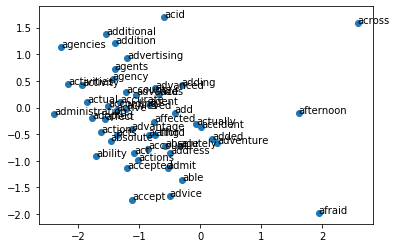

In [22]:
EmbeddingsHandler.plot_words(rot_histo_df, end=50)

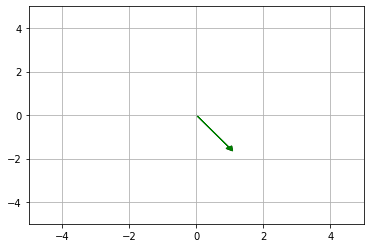

In [24]:
EmbeddingsHandler.plot_word_vectors(rot_histo_df, histo_glove, "man")

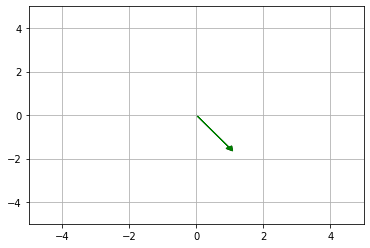

In [25]:
EmbeddingsHandler.plot_word_vectors(rot_histo_df, rot_histo_df, "man")

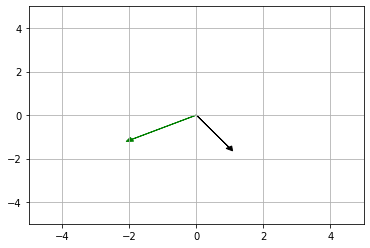

In [26]:
EmbeddingsHandler.plot_word_vectors(rot_histo_df, glove, "man")

In [27]:
EmbeddingsHandler.find_closest_embeddings(glove_dict, glove_dict["man"])

['woman', 'guy', 'boy', 'men', 'father']

In [28]:
EmbeddingsHandler.cosine_distance(glove_dict["man"], glove_dict["man"])

0.0

In [29]:
EmbeddingsHandler.cosine_distance(glove_dict["man"], glove_dict["woman"])

0.2598255446028722

In [30]:
EmbeddingsHandler.cosine_distance(rotated_histo["man"], histo_dict["man"])

0.9835873120445642

In [31]:
EmbeddingsHandler.cosine_distance(rotated_histo["man"], glove_dict["man"])

0.2012666910722546

In [32]:
EmbeddingsHandler.cosine_distance(histo_dict["man"], glove_dict["man"])

0.9725397315320365

In [33]:
words = [('man', 'woman'), ('boy', 'girl'), ('father', 'mother'), ('male', 'female')]

for w1, w2 in words:
    print(w1, "-", w2)
    print("Glove: ", EmbeddingsHandler.cosine_distance(glove_dict[w1], glove_dict[w2]))
    print("Histo: ", EmbeddingsHandler.cosine_distance(histo_dict[w1], histo_dict[w2]))
    print("Rotated histo: ", EmbeddingsHandler.cosine_distance(rotated_histo[w1], rotated_histo[w2]))
    print("Glove - Rotated histo: ", EmbeddingsHandler.cosine_distance(glove_dict[w1], rotated_histo[w2]))
    print("Histo - Rotated histo: ", EmbeddingsHandler.cosine_distance(histo_dict[w1], rotated_histo[w2]), "\n")

man - woman
Glove:  0.2598255446028722
Histo:  0.33789175706939767
Rotated histo:  0.33789175706939767
Glove - Rotated histo:  0.387623813486736
Histo - Rotated histo:  0.9956495085842296 

boy - girl
Glove:  0.18516771091676343
Histo:  0.2916511167242778
Rotated histo:  0.29165111672427735
Glove - Rotated histo:  0.29422515685599193
Histo - Rotated histo:  1.0011122753352135 

father - mother
Glove:  0.17017547261517962
Histo:  0.2388168386518108
Rotated histo:  0.23881683865181047
Glove - Rotated histo:  0.30232639334692546
Histo - Rotated histo:  1.0318478812616776 

male - female
Glove:  0.06572268751590193
Histo:  0.198832372257857
Rotated histo:  0.19883237225785688
Glove - Rotated histo:  0.3165672599432128
Histo - Rotated histo:  1.0454643496340856 

